In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [55]:
model = tf.keras.models.load_model('modelos/species_recognition_model_mobilenet_v2.h5_2.h5')



In [56]:
image_path = 'directorios/test/Aulacophora indica (Gmelin)/002_1091.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)


In [57]:
first_conv_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
last_conv_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

predictions1  = first_conv_model.predict(image)
predictions2  = last_conv_model.predict(image)


1/1 [==============================] - 1s 622ms/step


In [58]:
weights = predictions1[0]
weights2 = predictions2[0]

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta y transforma los pesos utilizando MinMaxScaler
weights_normalized = scaler.fit_transform(weights.reshape(-1, 1)).reshape(weights.shape)
weights_normalized2 = scaler.fit_transform(weights2.reshape(-1, 1)).reshape(weights2.shape)


In [60]:
weights_resized = cv2.resize(weights_normalized, (image.shape[2], image.shape[1]))
weights_resized2 = cv2.resize(weights_normalized2, (image.shape[2], image.shape[1]))

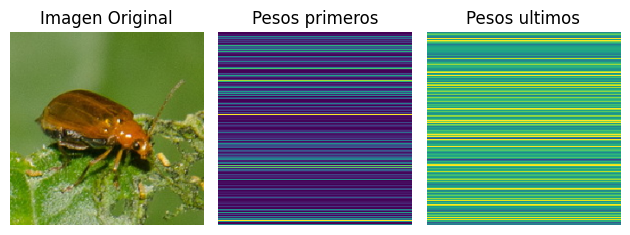

In [68]:
plt.subplot(1, 3, 1)
plt.imshow(image[0])
plt.axis('off')
plt.title('Imagen Original')

# Mostrar los pesos en la primera imagen
plt.subplot(1, 3, 2)
plt.imshow(weights_resized, cmap='viridis',vmin=0, vmax=0.5)
plt.axis('off')
plt.title('Pesos primeros')

# Mostrar los pesos en la segunda imagen
plt.subplot(1, 3, 3)
plt.imshow(weights_resized2, cmap='viridis',vmin=0, vmax=0.5)
plt.axis('off')
plt.title('Pesos ultimos')

plt.tight_layout()
plt.show()


In [69]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])


In [74]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'directorios/train',
    shuffle=True,
    batch_size=128,
    image_size=(116,116)
)

Found 3138 files belonging to 40 classes.


In [77]:
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


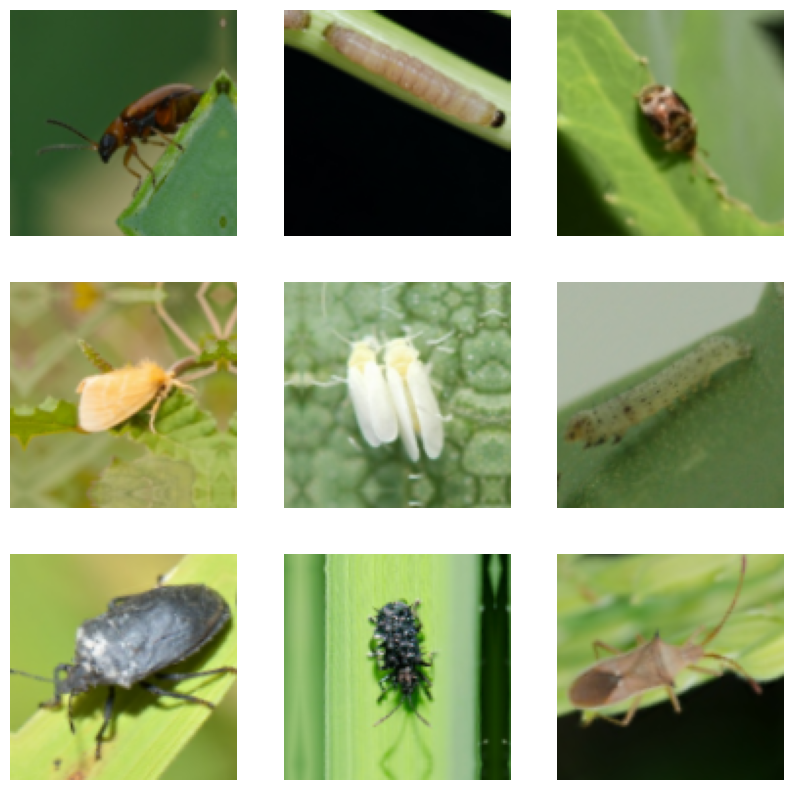

In [83]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(image[i] / 255)
    plt.axis('off')
